<a href="https://colab.research.google.com/github/hawkilol/simDisc/blob/main/sim_delivery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulação de filas referente à entregas de produtos
___

*=> **Abstract.** This article describes the development of a discrete simulation environment referring to a product delivery system in a commercial network, aiming to estimate what the increase in the number of couriers in the system will affect the system. This work is done for the discipline of Discrete Simulation of the bachelor's degree in Computer Science, taught by teacher Filipe de Oliveira Saraiva.*

*=> **Resumo.** Este meta-artigo descreve o desenvolvimento de um ambiente de simulação discreta referente a um sistema de entrega de produtos de uma rede comercial, objetivando estimar o que o aumento no número de entregadores no sistema irá afetar no sistema. Este trabalho é feito para a disciplina de Simulação Discreta do curso de bachalerado em Ciência da Computação, ministrada pelo docente Filipe de Oliveira Saraiva.*

# Introdução
___

Desde os primordios da computacao, a criacao de ambientes simulacionais são de suma importancia. Ele permite mapear unidades da vida real para estatistica, não somente lidando com dados atuais, mas até dados futuros.

[Simulação é um processo de experimentação com um modelo detalhado de um
sistema real para determinar como o sistema responderá a mudanças em sua estrutura, ambiente ou condições de contorno.]

Dessa forma, para melhor entendimento de como foi feito a simulação, este trabalho foi dividido em quatro outras seções: a Seção 2, que descreve o domínio do problema, incluindo os dados coletados para sustentar o domínio; a Seção 3, que utiliza dos dados coletados para construir um cenário de modelagem teórico baseado em modelos clássicos; a Seção 4, que apresenta a simulação e os resultados da mesma; a Seção 5, que apresenta cenários fictícios de aumento ou diminuição de recursos competidos para análisar os comportamentos experados; e a Seção 6, que apresenta as considerações finais baseadas nos resultados obtidos mediante uso de simulação.

# Descrição do Problema
___

O problema selecionado para construção de um ambiente de simulação foi a predição do tempo de entrega de uma ordem entre um restaurante e um cliente. O conjunto de dados obtido na amostragem do problema é referente à uma grande corporação da Índia referente ao gerenciamento logístico dos entregadores que fazem o delivery de alimentos provenientes de restaurantes.

Conforme evidenciado na Tabela 1, foi obtido dados que permitem analisar bllamlmlsamblmmaslmlsvamlm.

| Dado              | Descrição.                                |
|---------------------------|---------------------------------------------------------------|
| Id do Pedido              | Identificador único do pedido.                                |
| Id da Loja                | Id do Restaurante provedor de serviço.                        |
| Categoria do restaurante  | Categoria do Restaurante (Pizzaria, Hamburgueria, etc)        |
| Ordem do Protocolo        | Código que identifica como o delivery foi requisitado.        |
| Criado em                 | Data e Hora efetiva que o pedido foi solicitado pelo Cliente. |
| Finalizado em             | Data e Hora efetiva que o pedido chegou ao Cliente.           |
| Menor valor do produto:   | Preço do produto de menor custo no pedido.                    |
| Maior valor do produto:   | Preço do produto de maior custo no pedido.                    |
| Preço Final               | Preço total do pedido.                                        |
| Items distintos           | Número de itens distintos em um único pedido                  |
| Itens Totais              | Número total de itens no pedido.                              |
| Entregadores livres       | Número de entregadores disponíveis                            |
| Entregadores ocupados     | Número de entregadores indisponíveis                          |
| Ordens totais pendentes   | Ordens totais pendentes em um dado momento.      
Tabela 1: Dados totais coletados referente ao domínio do problema. Fonte: [Kaggle](https://www.kaggle.com/datasets/ranitsarkar01/porter-delivery-time-estimation)

Todavia, pelo fato de haver dados que se tornam irrelevantes para o contexto da simulação, se torna fundamental a filtragem dos dados referentes ao domínio do problema, parte esta referente à modelagem do problema computacional. Desse modo, abfasuibfusibfuiasbuifbsabusbufba.

| Dado              | Descrição.                                |
|---------------------------|---------------------------------------------------------------|
| Ordem do Protocolo        | Código que identifica como o delivery foi requisitado.        |
| Criado em                 | Data e Hora efetiva que o pedido foi solicitado pelo Cliente. |
| Finalizado em             | Data e Hora efetiva que o pedido chegou ao Cliente.           |
| Entregadores livres       | Número de entregadores disponíveis                            |
| Entregadores ocupados     | Número de entregadores indisponíveis                          |
| Ordens totais pendentes   | Ordens totais pendentes em um dado momento.                   |
Tabela 2: Dados filtrados referente ao domínio da simulação.

# Modelagem
___


> ## Modelagem de Dados
___

Em geral, a modelagem dos dados consiste em três etapas fundamentais: a coleta de dados referentes ao necessário pelo domínio do problema; o tratamento de dados referentes à erros realizados na coleta de dados; e o mapeamento de uma amostra para uma distribuição estatítica, conhecido como inferência [Chwif and Medina, 2006]. Isso permite a geração de dados robustos do domínio do problema de forma robusta, considerando grau de variância e alterações ao longo do tempo, e pelo fato de funcionar somente quando os dados coletados possuem conexão direta, é imprescindível para garantir a confiabilidade dos dados.

In [ ]:
!pip install simpy pandas matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
### IMPORTAR DEPENDÊNCIAS
import statistics as st
import math
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from scipy.stats import expon, norm, kstest
import simpy
import pandas as pd
criterio = 'tempo_entrega'

>> ### Amostragem

In [ ]:
dados = pd.read_csv('https://gist.githubusercontent.com/hawkilol/388b963f0a754985530069b0eb67ca06/raw/a9ab37eeeab0f084bbfd6480f0b1ad445e1574b3/porter_data.csv')
dados.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

## Funções Auxiliares

In [ ]:
criterio = 'tempo_entrega'

In [ ]:
def histograma(dados : pd.DataFrame, q1 : int, q3 : int):
    print("\n\n===== HISTOGRAMA =====")
    A = q3 - q1
    k = round(1 + 3.3 * math.log10(dados.shape[0]))

    print("  > Número de Classes:", k)
    h = A / k

    plt.hist(dados[criterio].dt.total_seconds().astype(int), bins = k)
    plt.show()


In [ ]:
def removeOut(data: pd.DataFrame, q1 : int, q3 : int):
    A = q3 - q1

    dados = data.copy()
    # condicao = dados[criterio] > '0 days 00:00:50'
    # dados = dados.drop(dados[condicao].index)

    condicao = (dados[criterio] < q1 - 3 * A) | (dados[criterio] > q3 + 3 * A)
    outliers = dados[condicao]
    print("  OUTLIERS")
    print("Min:", outliers[criterio].min())
    print("Max:", outliers[criterio].max())
    print("Número de Outliers:", outliers.shape[0])

    dados = dados.drop(outliers.index)
    print('\n==================\n')
    print(" DADOS APÓS REMOÇÃO DE OUTLIER")
    print("Min:", dados[criterio].min())
    print("Max:", dados[criterio].max())
    print("Número de linhas após remoção:", dados.shape[0])
    # print(dados)

    return dados


In [ ]:
dados.drop(dados.index[17449], inplace=True)

>> ### Tratamento de Dados

In [ ]:
# não precisa uma coluna para índices porque o id já vem com o DataFrame
dados = dados.drop(dados.columns[[0]], axis=1)

# Transforma de String para Datetime
dados['created_at'] = pd.to_datetime(dados['created_at'])
dados['actual_delivery_time'] = pd.to_datetime(dados['actual_delivery_time'])

# Remover colunas desnecessárias
dados = dados.drop(columns=['min_item_price', 'max_item_price', 'order_protocol',
                            'subtotal', 'order_protocol', 'store_primary_category',
                            'store_id', 'total_items', 'num_distinct_items'], axis=1)

# dropa linhas com valores nulos
dados = dados.dropna()


# Ordena com base na criação do pedido, do mais antigo ao mais recente
dados = dados.sort_values(by='created_at')

# Cria nova coluna que é o tempo total até o produto ser entregue
dados['tempo_entrega'] = dados['actual_delivery_time'] - dados['created_at']

# Cria nova coluna que é o tempo entre cada pedido
dados['tempo_pedido'] = dados['created_at'] - dados['created_at'].shift(1)

# Reduz o período para apenas um dia, que corresponde à sexta-feira
condicao = ((dados['created_at'] >= '27/01/2015 15:00:00') & (dados['created_at'] <= '28/01/2015 07:59:59'))
dados = dados[condicao]
dados = dados.reset_index(drop=True)


dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5291 entries, 0 to 5290
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   created_at                5291 non-null   datetime64[ns] 
 1   actual_delivery_time      5291 non-null   datetime64[ns] 
 2   total_onshift_partners    5291 non-null   float64        
 3   total_busy_partners       5291 non-null   float64        
 4   total_outstanding_orders  5291 non-null   float64        
 5   tempo_entrega             5291 non-null   timedelta64[ns]
 6   tempo_pedido              5291 non-null   timedelta64[ns]
dtypes: datetime64[ns](2), float64(3), timedelta64[ns](2)
memory usage: 289.5 KB


>>> ## Análise de Outliers

In [ ]:
quartis = st.quantiles(dados[criterio])
q1 = quartis[0]
q3 = quartis[2]

In [ ]:
dados2 = removeOut(dados, q1, q3)

  OUTLIERS
Min: 0 days 01:47:21
Max: 0 days 07:52:05
Número de Outliers: 31


 DADOS APÓS REMOÇÃO DE OUTLIER
Min: 0 days 00:07:50
Max: 0 days 01:46:58
Número de linhas após remoção: 5260


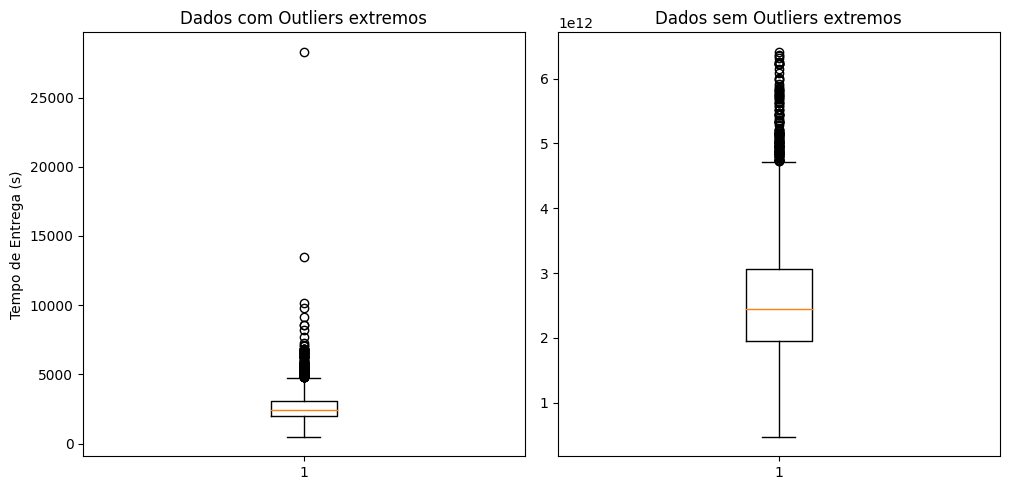

In [ ]:
# Create the figure and axes objects
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot the first boxplot
axes[0].boxplot(dados[criterio].dt.total_seconds().astype(int))
axes[0].set_title('Dados com Outliers extremos')

# Plot the second boxplot
axes[1].boxplot(dados2[criterio])
axes[1].set_title('Dados sem Outliers extremos')

# Adjust the spacing between subplots
fig.tight_layout()

axes[0].set_ylabel('Tempo de Entrega (s)')
# Show the plot
plt.show()



===== HISTOGRAMA =====
  > Número de Classes: 13


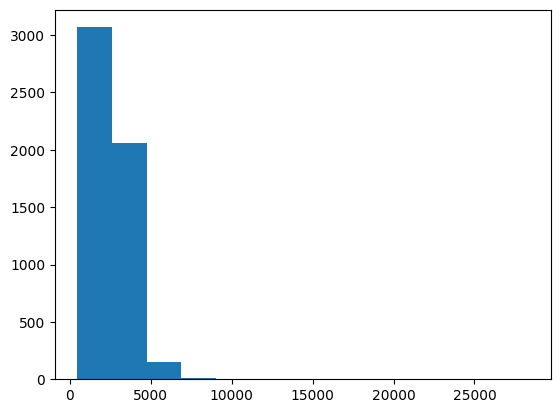

In [ ]:
histograma(dados, q1, q3)



===== HISTOGRAMA =====
  > Número de Classes: 13


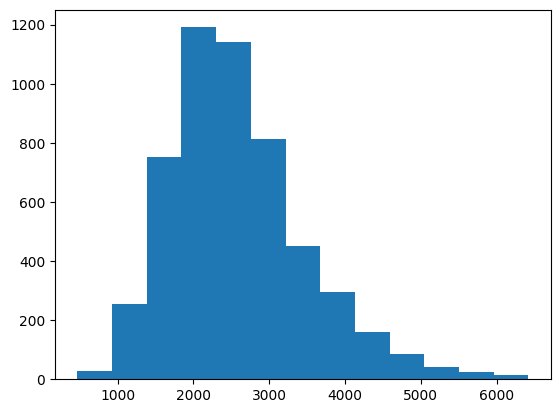

In [ ]:
histograma(dados2, q1, q3)

In [ ]:
dados2[criterio] = dados2[criterio].dt.total_seconds().astype(int)

>>> ## Amostra dos 15 primeiros pedidos

In [ ]:
dados2 = dados2.reset_index(drop=True)

print(dados2.head(15))

            created_at actual_delivery_time  total_onshift_partners  \
0  2015-01-27 15:37:07  2015-01-27 16:24:27                     9.0   
1  2015-01-27 15:47:57  2015-01-27 16:33:25                     0.0   
2  2015-01-27 15:52:16  2015-01-27 16:47:08                     1.0   
3  2015-01-27 15:52:45  2015-01-27 16:46:17                     3.0   
4  2015-01-27 15:55:21  2015-01-27 16:26:53                     3.0   
5  2015-01-27 16:01:07  2015-01-27 16:32:30                     1.0   
6  2015-01-27 16:04:20  2015-01-27 16:52:03                     4.0   
7  2015-01-27 16:04:25  2015-01-27 17:26:50                     1.0   
8  2015-01-27 16:06:55  2015-01-27 17:00:06                     6.0   
9  2015-01-27 16:06:59  2015-01-27 17:14:24                     1.0   
10 2015-01-27 16:09:21  2015-01-27 16:56:43                     6.0   
11 2015-01-27 16:10:07  2015-01-27 17:07:15                     1.0   
12 2015-01-27 16:11:16  2015-01-27 17:31:55                     2.0   
13 201

#### Baseado no Histograma apresentado, deduz-se visualmente que a função de probabilidade utilizada é a **DISTRIBUIÇÃO NORMAL**.

In [ ]:
df = pd.DataFrame([], columns=["valorObservado", "frequenciaObservada", "frequenciaAcumuladaObservada", "frequenciaAcumuladaObservadaNormalizada"])

## Medidas Estatísticas Auxiliares
minimo = min(dados2[criterio])
maximo = max(dados2[criterio])
media = st.mean(dados2[criterio])
tamanho = dados2[criterio].shape[0]

## Teste de Aderência
Teste de Kolgomorov-Smirnov a fim de testar a hipótese que se trata de uma distribuição normal

In [ ]:
count = [0 for k in range((maximo) + 1)]
for i in dados2[criterio]:
    count[i] += 1

dadosUniqCount = ({i:0 for i in range(minimo, maximo + 1)})
for key in dadosUniqCount.keys():
    dadosUniqCount[key] = count[key]
dadosUniqCount= dict(sorted(dadosUniqCount.items()))


df.valorObservado = list(dadosUniqCount.keys())

df.frequenciaObservada = list(dadosUniqCount.values())

df.frequenciaAcumuladaObservada = 0
frequenciaAOb = df.frequenciaAcumuladaObservada.to_list()
for i in range(df.shape[0]):
    if(i == 0):
        frequenciaAOb[i] = df.frequenciaObservada[0]
    else:
        frequenciaAOb[i] = (df.frequenciaObservada[i] + frequenciaAOb[i - 1])


df.frequenciaAcumuladaObservada = frequenciaAOb

df.frequenciaAcumuladaObservadaNormalizada = df.frequenciaAcumuladaObservada / df.frequenciaAcumuladaObservada.max()

df

,valorObservado,frequenciaObservada,frequenciaAcumuladaObservada,frequenciaAcumuladaObservadaNormalizada
0,470,1,1,0.00019
1,471,0,1,0.00019
2,472,0,1,0.00019
3,473,0,1,0.00019
4,474,0,1,0.00019
...,...,...,...,...
5944,6414,0,5259,0.99981
5945,6415,0,5259,0.99981
5946,6416,0,5259,0.99981
5947,6417,0,5259,0.99981


## Plotando os gráficos

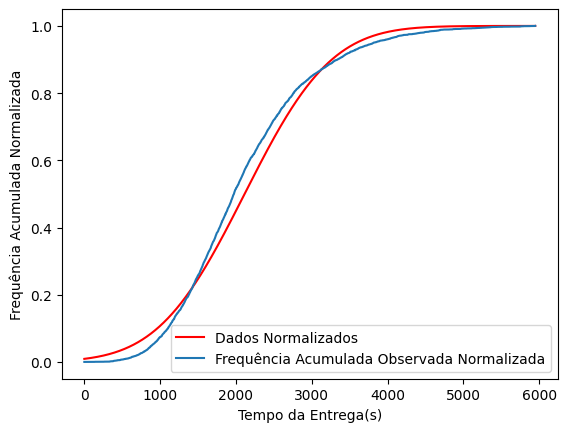

In [ ]:
dados_norm_to_plot = norm.cdf(df.valorObservado, loc=media, scale=st.stdev(dados2[criterio]))

plt.plot(dados_norm_to_plot, label="Dados Normalizados", color='red')
plt.plot(df['frequenciaAcumuladaObservadaNormalizada'].to_numpy(), label="Frequência Acumulada Observada Normalizada")
plt.legend()
plt.xlabel('Tempo da Entrega(s)')
plt.ylabel('Frequência Acumulada Normalizada')
plt.show()


In [ ]:
df["frequenciaAcumuladaTeoricaNo"] = dados_norm_to_plot

df['D'] = abs(df.frequenciaAcumuladaTeoricaNo - df.frequenciaAcumuladaObservadaNormalizada)
df

,valorObservado,frequenciaObservada,frequenciaAcumuladaObservada,frequenciaAcumuladaObservadaNormalizada,frequenciaAcumuladaTeoricaNo,D
0,470,1,1,0.00019,0.009307,0.009117
1,471,0,1,0.00019,0.009335,0.009145
2,472,0,1,0.00019,0.009363,0.009173
3,473,0,1,0.00019,0.009391,0.009201
4,474,0,1,0.00019,0.009419,0.009229
...,...,...,...,...,...,...
5944,6414,0,5259,0.99981,0.999990,0.000180
5945,6415,0,5259,0.99981,0.999990,0.000180
5946,6416,0,5259,0.99981,0.999990,0.000180
5947,6417,0,5259,0.99981,0.999990,0.000180


## Veredito

In [ ]:
D_critico = ((1.36) / (tamanho ** 0.5))
print(D_critico)
print(max(df.D))
if D_critico > max(df.D):
  print("MÉTODO KS GARANTE A DISTRIBUIÇÃO NORMAL")
else:
  print("MÉTODO KS NÃO GARANTE A DISTRIBUIÇÃO NORMAL")

0.018751932726750947
0.07169813531331592
MÉTODO KS NÃO GARANTE A DISTRIBUIÇÃO NORMAL


## Distribuição dos Pedidos ao longo do dia

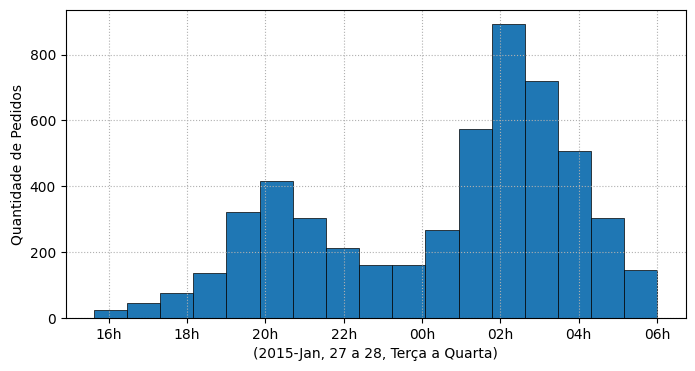

In [ ]:
from matplotlib.dates import DateFormatter

# Calendário Indiano
plt.figure(figsize=(8, 4))
plt.xlabel('(2015-Jan, 27 a 28, Terça a Quarta)')
plt.ylabel('Quantidade de Pedidos')
plt.hist(dados2['created_at'], bins=17, edgecolor='black', linewidth=0.5)
date_form = DateFormatter("%Hh")
plt.gca().xaxis.set_major_formatter(date_form)
plt.grid(linestyle='dotted')

plt.show()

In [ ]:

# with open('dataset.csv', mode='r') as csv_file:
#     csv_reader = csv.DictReader(csv_file)
#     line_count = 0
#     total_entrega = {}
#     for row in csv_reader:
#         if row["store_id"] not in total_entrega:
#             total_entrega[row["store_id"]] = 1
#         else:
#             total_entrega[row["store_id"]] += 1

#     chaves_ordenadas = sorted(total_entrega, key=total_entrega.get, reverse=True)
#     for chave in chaves_ordenadas:
#         valor = total_entrega[chave]
#         print(f'Chave: {chave}, Valor: {valor}')

In [ ]:
kstest(dados2[criterio], 'norm')

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=470, statistic_sign=-1)

> ## Modelagem de Cenário de Simulação
___

Em geral, a modelagem dos dados consiste em três etapas fundamentais: a coleta de dados referentes ao necessário pelo domínio do problema; o tratamento de dados referentes à erros realizados na coleta de dados; e o mapeamento de uma amostra para uma distribuição estatítica, conhecido como inferência [Chwif and Medina, 2006].

Dessa forma, aplicando essas técnicas tendo definido

>> ### Modelo ACD




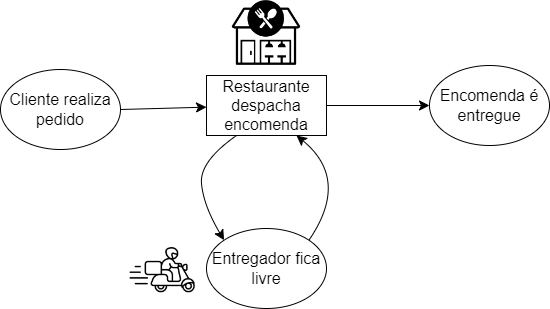


---


>> ### Implementação


In [ ]:
len(dados2)

5260

In [ ]:
dados.head()

,created_at,actual_delivery_time,total_onshift_partners,total_busy_partners,total_outstanding_orders,tempo_entrega,tempo_pedido
0,2015-01-27 15:13:57,2015-01-27 18:58:47,0.0,0.0,0.0,0 days 03:44:50,0 days 00:42:30
1,2015-01-27 15:37:07,2015-01-27 16:24:27,9.0,8.0,-3.0,0 days 00:47:20,0 days 00:23:10
2,2015-01-27 15:47:57,2015-01-27 16:33:25,0.0,0.0,0.0,0 days 00:45:28,0 days 00:10:50
3,2015-01-27 15:52:16,2015-01-27 16:47:08,1.0,1.0,3.0,0 days 00:54:52,0 days 00:04:19
4,2015-01-27 15:52:45,2015-01-27 16:46:17,3.0,0.0,0.0,0 days 00:53:32,0 days 00:00:29


In [ ]:
dados2['pedido_realizado_em'] = dados2.created_at - dados2.created_at.min()
dados2.head()

,created_at,actual_delivery_time,total_onshift_partners,total_busy_partners,total_outstanding_orders,tempo_entrega,tempo_pedido,pedido_realizado_em
0,2015-01-27 15:37:07,2015-01-27 16:24:27,9.0,8.0,-3.0,2840,0 days 00:23:10,0 days 00:00:00
1,2015-01-27 15:47:57,2015-01-27 16:33:25,0.0,0.0,0.0,2728,0 days 00:10:50,0 days 00:10:50
2,2015-01-27 15:52:16,2015-01-27 16:47:08,1.0,1.0,3.0,3292,0 days 00:04:19,0 days 00:15:09
3,2015-01-27 15:52:45,2015-01-27 16:46:17,3.0,0.0,0.0,3212,0 days 00:00:29,0 days 00:15:38
4,2015-01-27 15:55:21,2015-01-27 16:26:53,3.0,0.0,0.0,1892,0 days 00:02:36,0 days 00:18:14


In [ ]:
dados2.total_onshift_partners.mean()

41.29106463878327

In [ ]:
class Cliente:
    def __init__(self, env, cliente_id, tempo_pedido, tempo_entrega):
        self.env = env
        self.cliente_id = cliente_id
        self.tempo_pedido = tempo_pedido
        self.tempo_entrega = tempo_entrega


class Restaurante:
    def __init__(self, env, store_restaurante, entregador):
        self.env = env
        self.store_restaurante = store_restaurante
        self.entregador = entregador

    def entrega(self, cliente):
        yield self.env.timeout(cliente.tempo_pedido)
        #print(f"Restaurante recebeu o pedido: {cliente.cliente_id} em {self.env.now}")
        with self.entregador.request() as req:
            yield req
            #print(f"Entregador saiu para realizar a entrega do pedido: {cliente.cliente_id} em {self.env.now}")
            yield self.env.timeout(cliente.tempo_entrega)  # Tempo de entrega
            yield self.store_restaurante.put((
                cliente.tempo_pedido,
                self.env.now,
                cliente.cliente_id,
                self.entregador.capacity - self.entregador.count,
                self.entregador.count,
                len(self.entregador.queue)))
            #print(f"Entregador entregou a encomenda: {cliente.cliente_id} em ${self.env.now}")
            yield self.env.timeout(1)  # Tempo para atualizar o estado do pedido

In [ ]:
def simula(dataframe, entregadores):
    env = simpy.Environment()
    store_restaurante = simpy.Store(env)
    entregador = simpy.Resource(env, capacity=entregadores)
    entregador.events = []  # Lista para armazenar os eventos de entrega

    restaurante = Restaurante(env, store_restaurante, entregador)

    data = []

    # Cria e inicia os processos de clientes na ordem desejada
    for index, row in dataframe.iterrows():
        cliente = Cliente(env, index, row['pedido_realizado_em'].total_seconds(),
                          row.tempo_entrega )
        env.process(restaurante.entrega(cliente))

    env.run()
    headers = ["Criado em", "Finalizado em", "Código do Delivery",
               "Entregadores livres", "Entregadores ocupados",
               "Ordens totais pendentes"]
    df = pd.DataFrame(store_restaurante.items, columns=headers)
    print(df.to_markdown())
    return [entregadores, df['Finalizado em'].mean() / 60]

In [ ]:
simula(dados2.iloc[:100,:], 5)

|    |   Criado em |   Finalizado em |   Código do Delivery |   Entregadores livres |   Entregadores ocupados |   Ordens totais pendentes |
|---:|------------:|----------------:|---------------------:|----------------------:|------------------------:|--------------------------:|
|  0 |           0 |            2840 |                    0 |                     0 |                       5 |                        17 |
|  1 |        1094 |            2986 |                    4 |                     0 |                       5 |                        17 |
|  2 |         650 |            3378 |                    1 |                     0 |                       5 |                        21 |
|  3 |         938 |            4150 |                    3 |                     0 |                       5 |                        35 |
|  4 |         909 |            4201 |                    2 |                     0 |                       5 |                        35 |
|  5 |        1440 |

[5, 503.83366666666666]

In [ ]:
resultados = []

In [ ]:
for entregadores in range(1, 100):
    resultados.append(simula(dados2.iloc[:100,:], entregadores))

A saída de streaming foi truncada nas últimas 5000 linhas.
| 98 |        7477 |           10164 |                   94 |                    48 |                       2 |                         0 |
| 99 |        6112 |           10395 |                   71 |                    49 |                       1 |                         0 |
|    |   Criado em |   Finalizado em |   Código do Delivery |   Entregadores livres |   Entregadores ocupados |   Ordens totais pendentes |
|---:|------------:|----------------:|---------------------:|----------------------:|------------------------:|--------------------------:|
|  0 |           0 |            2840 |                    0 |                    29 |                      22 |                         0 |
|  1 |        1094 |            2986 |                    4 |                    29 |                      22 |                         0 |
|  2 |        1440 |            3323 |                    5 |                    26 |                

In [ ]:
dfResultados = pd.DataFrame(resultados, columns=['quantidade_entregadores', 'media_tempo'])
dfResultados

,quantidade_entregadores,media_tempo
0,1,2379.456000
1,2,1205.418000
2,3,814.983500
3,4,620.524167
4,5,503.833667
...,...,...
94,95,120.615333
95,96,120.615333
96,97,120.615333
97,98,120.615333


In [ ]:
import matplotlib.pyplot as plt

def plotar_grafico_de_pontos_e_linha(dataframe):
    # Extrai as colunas do DataFrame
    media_tempo = dataframe['media_tempo']
    quantidade_entregadores = dataframe['quantidade_entregadores']



    # Ordena as coordenadas em ordem crescente de media_tempo
    dataframe_ordenado = dataframe.sort_values(by='media_tempo')

    # Extrai as coordenadas de media_tempo e quantidade_entregadores da linha
    linha_media_tempo = dataframe_ordenado['media_tempo']
    linha_quantidade_entregadores = dataframe_ordenado['quantidade_entregadores']

    # Plota a linha
    plt.plot(linha_quantidade_entregadores, linha_media_tempo,color='red', label='Linha')

    # Configurações adicionais do gráfico
    plt.ylabel('Tempo Médio (Minutos)')
    plt.xlabel('Quantidade de Entregadores')

    plt.title('Resultado da Simulação')

    # Exibe o gráfico
    plt.show()


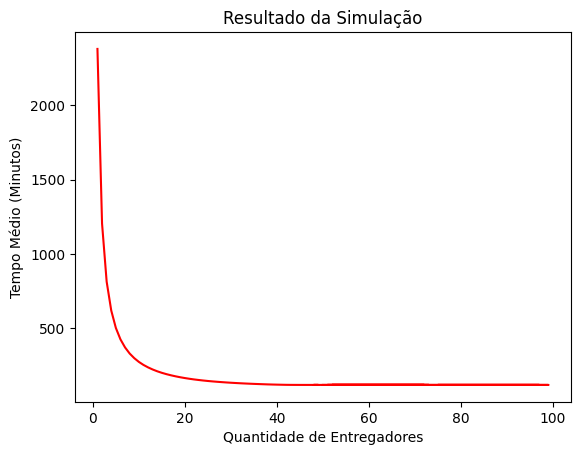

In [ ]:
plotar_grafico_de_pontos_e_linha(dfResultados)

# Conclusão
___
Portanto, tendo em vista os fatos objetivados